## Data 

In [15]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('~/Downloads/Omdena/MLOps/solcast_project/datasets/cleaned/cleaned_solar_irradiation.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2018-12-31,12,2018-12-31,11.440000,6.850000,63.600000,986.080000,257.800000,5.160000,310.500000,162.600000,305.000000
1,2019-01-01,1,2019-01-01,8.627273,10.709091,67.909091,994.736364,36.454545,5.445455,16.272727,116.454545,119.272727
2,2019-01-02,1,2019-01-02,3.436364,31.627273,94.909091,993.781818,8.090909,5.081818,0.000000,32.545455,32.545455
3,2019-01-03,1,2019-01-03,6.518182,15.536364,79.272727,989.736364,283.545455,5.263636,238.272727,125.454545,219.181818
4,2019-01-04,1,2019-01-04,11.209091,8.990909,48.818182,990.590909,301.909091,3.900000,720.000000,49.727273,364.545455


In [3]:
# Descriptive statistics summary
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,6.526892,22.632898,28.976532,57.627901,992.011334,155.917407,3.924260,332.814264,151.360058,356.968399
std,3.452950,7.743299,13.187009,15.669858,5.306765,69.733604,1.472333,237.784288,61.085213,140.447967
min,1.000000,-8.958333,3.281818,16.181818,974.892308,5.615385,0.823077,0.000000,32.545455,32.545455
25%,4.000000,16.969231,17.423077,46.692308,988.500000,113.583333,2.827273,106.461538,101.181818,257.866667
50%,7.000000,23.333333,30.026667,57.384615,991.492308,165.076923,3.707692,339.272727,150.733333,380.615385
75%,10.000000,29.292308,39.540000,68.384615,995.100000,188.545455,4.941667,536.615385,195.000000,470.692308
max,12.000000,35.873333,58.084615,96.000000,1011.366667,352.500000,10.245455,798.307692,320.307692,620.615385


In [4]:
# check the missing values
cleaned_df.isnull().sum()

Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
# summary of dataframe
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 12 columns):
Unnamed: 0         1097 non-null object
MonthPE            1097 non-null int64
Date               1097 non-null object
Daily_Temp         1097 non-null float64
Daily_Precip       1097 non-null float64
Daily_Humidity     1097 non-null float64
Daily_Pressure     1097 non-null float64
Daily_WindDir      1097 non-null float64
Daily_WindSpeed    1097 non-null float64
Daily_DNI          1097 non-null float64
Daily_DHI          1097 non-null float64
Daily_radiation    1097 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 103.0+ KB


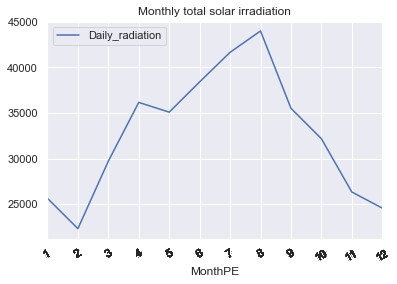

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

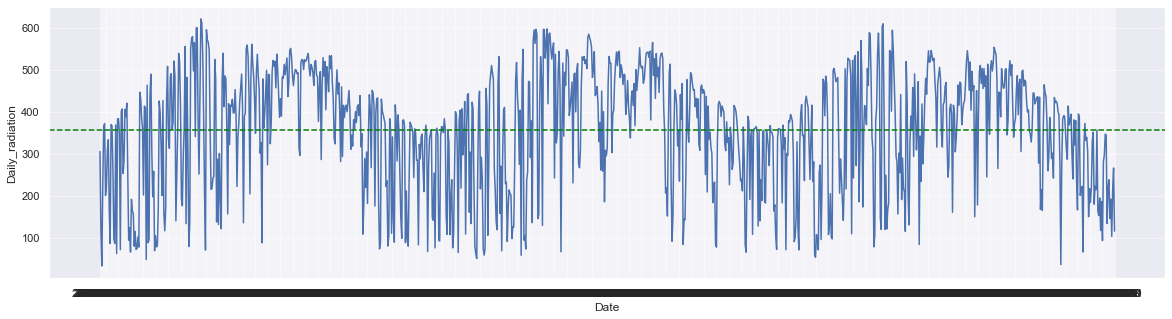

In [11]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
#ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

AttributeError: module 'seaborn' has no attribute 'histplot'

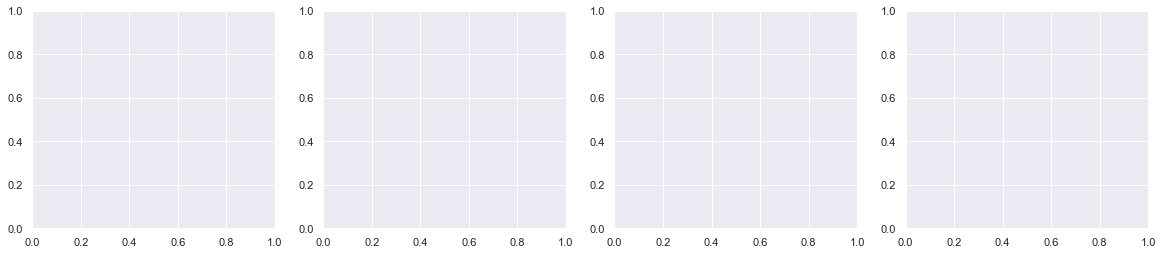

In [12]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

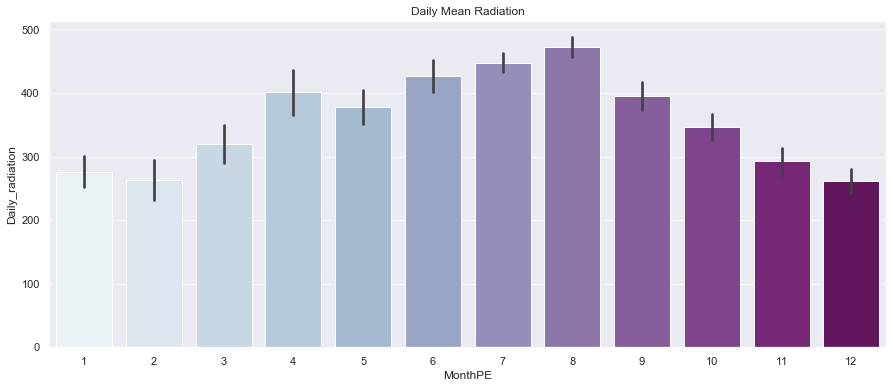

In [13]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

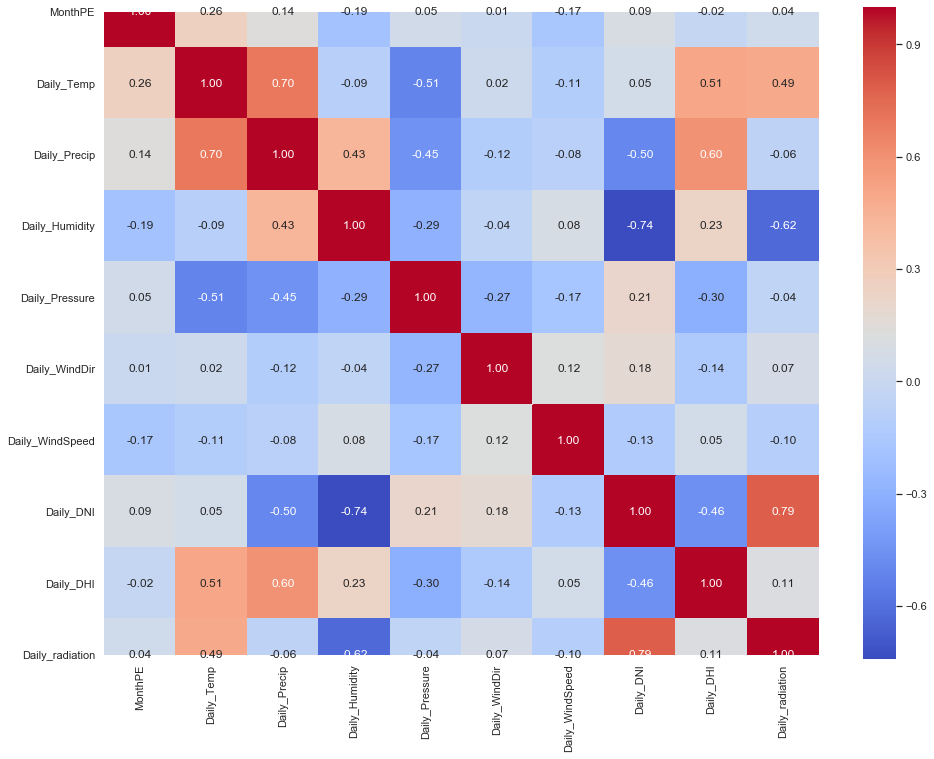

In [16]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

## Statistical check: stationary or non-stationary

In [17]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

ADF Statistic: -3.578747
p-value: 0.006181
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
